TCC Classificação de municípios com base em indicadores do MEI
Análise e Agrupamento
28/06/2021

In [121]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
sns.__version__

'0.9.0'

In [122]:
# Importação do dataset completo após tratamento e merge
df_completo = pd.read_csv('completo.csv', header=0, delimiter='|')

df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cod_mun                           5570 non-null   int64  
 1   DAS_pagos                         5570 non-null   int64  
 2   qtd_optantes                      5570 non-null   int64  
 3   adimplencia                       5570 non-null   float64
 4   inadimplencia                     5570 non-null   float64
 5   uf                                5570 non-null   object 
 6   qtd_populacao_estimada            5570 non-null   int64  
 7   nm_municipio                      5570 non-null   object 
 8   vlr_adic_bruto_agropecuaria       5570 non-null   int64  
 9   vlr_adic_bruto_industria          5570 non-null   int64  
 10  vlr_adic_bruto_servicos           5570 non-null   int64  
 11  vlr_adic_bruto_administracao      5570 non-null   int64  
 12  vlr_ad

In [123]:
# Verifica valores nulos
#df_completo.isna().all(1)
#for k in range (1,xx)
df_nulos = df_completo[df_completo['vlr_adic_bruto_agropecuaria'].isnull()]
df_nulos

,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,uf,qtd_populacao_estimada,nm_municipio,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,vlr_adic_bruto_servicos,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,atividade_maior_vlr_adic_bruto,atividade_2maior_vlr_adic_bruto,atividade_3maior_vlr_adic_bruto


In [124]:
# Trata inadimplencia negativa (altera para 0)
df_completo['inadimplencia'].loc[df_completo['inadimplencia']<0] = 0   #.count()
#df_inadimplencia_neg

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [125]:
df_completo.loc[df_completo['inadimplencia']<0]

df_completo['inadimplencia'].describe()

count    5570.000000
mean        0.362513
std         0.157596
min         0.000000
25%         0.270000
50%         0.370000
75%         0.460000
max         0.960000
Name: inadimplencia, dtype: float64

In [126]:
df_completo['porte'] = pd.cut(df_completo['qtd_populacao_estimada'], [0, 25000, 50000, 100000, 1000000, 15000000], labels=["P1 Pequeno","P2 Pequeno","P3 Médio", "P4 Grande", "P5 Metrópole"])


4. Análise e Exploração dos Dados

In [127]:
df_completo[['DAS_pagos','qtd_optantes','inadimplencia','vlr_adic_bruto_total','impostos_liquidos_sobre_produtos','pib','pib_per_capita']].describe()

,DAS_pagos,qtd_optantes,inadimplencia,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita
count,5570.000000,5570.000000,5570.000000,5.570000e+03,5.570000e+03,5.570000e+03,5570.000000
mean,1102.329623,2031.750987,0.362513,1.079201e+06,1.782749e+05,1.257476e+06,23513.941725
std,7940.145510,16264.836406,0.157596,9.850775e+06,2.261762e+06,1.204775e+07,24238.463081
min,1.000000,12.000000,0.000000,1.377200e+04,6.400000e+01,1.412600e+04,4788.180000
25%,95.000000,151.000000,0.270000,7.836350e+04,3.420250e+03,8.213000e+04,9880.370000
50%,218.000000,333.000000,0.370000,1.728775e+05,1.010050e+04,1.833545e+05,17433.840000
75%,591.000000,920.000000,0.460000,4.569082e+05,3.722400e+04,4.939425e+05,28729.907500
max,452809.000000,903047.000000,0.960000,5.875291e+08,1.271543e+08,7.146834e+08,583171.850000


In [128]:
df_completo['qtd_populacao_estimada'].describe().apply("{0:f}".format)

count        5570.000000
mean        38017.179892
std        222892.992129
min           776.000000
25%          5442.250000
50%         11665.500000
75%         25663.750000
max      12325232.000000
Name: qtd_populacao_estimada, dtype: object

In [129]:
relat = df_completo.groupby(by=['porte'])
relat['porte'].count()

porte
P1 Pequeno      4132
P2 Pequeno       761
P3 Médio         351
P4 Grande        309
P5 Metrópole      17
Name: porte, dtype: int64

In [130]:
relat[['porte','DAS_pagos','qtd_optantes','inadimplencia','qtd_populacao_estimada']].mean()

,DAS_pagos,qtd_optantes,inadimplencia,qtd_populacao_estimada
porte,,,,
P1 Pequeno,225.014521,342.323088,0.342933,9.569174e+03
P2 Pequeno,822.212878,1328.534823,0.395348,3.427880e+04
P3 Médio,1824.732194,3106.581197,0.416809,6.880462e+04
P4 Grande,7783.822006,14900.653722,0.472913,2.445908e+05
P5 Metrópole,90519.411765,188038.058824,0.524118,2.729454e+06


In [131]:
df_completo[['porte','vlr_adic_bruto_administracao','vlr_adic_bruto_total','impostos_liquidos_sobre_produtos','pib','pib_per_capita']].groupby(by=['porte']).mean()

,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita
porte,,,,,
P1 Pequeno,4.530835e+04,1.827105e+05,1.468723e+04,1.973978e+05,21985.980269
P2 Pequeno,1.501057e+05,7.555628e+05,8.591162e+04,8.414744e+05,24693.455085
P3 Médio,2.941302e+05,1.678399e+06,2.393245e+05,1.917723e+06,27628.196923
P4 Grande,1.126676e+06,7.558230e+06,1.328472e+06,8.886702e+06,35494.135437
P5 Metrópole,1.720929e+07,1.033292e+08,2.190728e+07,1.252365e+08,39392.979412


<AxesSubplot:xlabel='inadimplencia'>

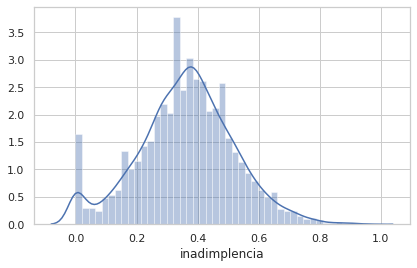

In [132]:
sns.set(style='whitegrid') # v 0.9.0

# Distribuição inadimplência
sns.distplot(df_completo['inadimplencia'])

<AxesSubplot:xlabel='porte', ylabel='count'>

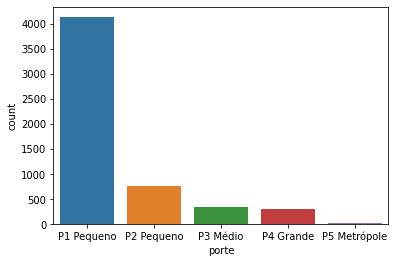

In [7]:
sns.countplot(x='porte', data=df_completo)

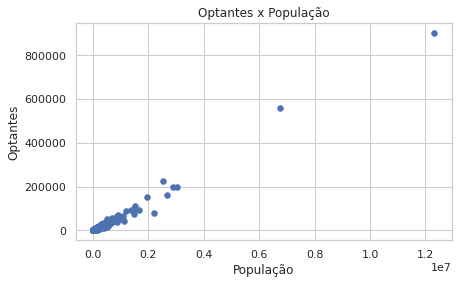

In [135]:
plt.scatter(df_completo['qtd_populacao_estimada'], df_completo['qtd_optantes'], s=30) 
plt.title('Optantes x População')
plt.xlabel('População')
plt.ylabel('Optantes')

#plt.legend()
plt.show()

<AxesSubplot:xlabel='porte', ylabel='inadimplencia'>

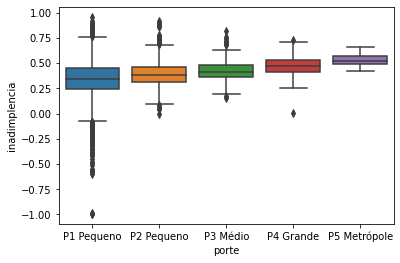

In [8]:
# Sem tratamento de inadimplencia negativa
sns.boxplot(x='porte', y='inadimplencia', data=df_completo)

<AxesSubplot:xlabel='porte', ylabel='inadimplencia'>

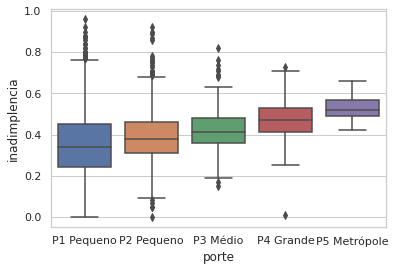

In [18]:
# Após tratamento de inadimplencia negativa (alterado para 0)
sns.boxplot(x='porte', y='inadimplencia', data=df_completo)

<AxesSubplot:xlabel='porte', ylabel='inadimplencia'>

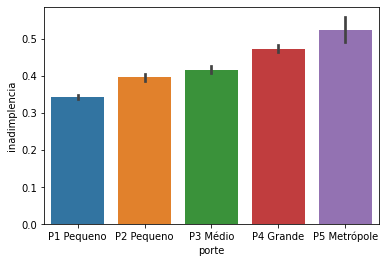

In [9]:
sns.barplot(x='porte', y='inadimplencia', data=df_completo)

In [211]:
df_uf = df_completo[['uf','qtd_optantes','inadimplencia', 'vlr_adic_bruto_total']].groupby('uf')
relat = df_uf.mean().sort_values(by='inadimplencia', ascending=False)
relat['qtd_municipios'] = df_uf['uf'].count() 
relat


,qtd_optantes,inadimplencia,vlr_adic_bruto_total,qtd_municipios
uf,,,,
AP,1220.812500,0.688125,9.790636e+05,16
AM,1683.112903,0.648226,1.360670e+06,62
RR,1173.266667,0.600000,8.178060e+05,15
AC,838.636364,0.536364,6.191843e+05,22
DF,200313.000000,0.530000,2.261249e+08,1
PA,1674.868056,0.507431,1.020063e+06,144
MA,611.423963,0.480553,4.008417e+05,217
RJ,14272.728261,0.476304,6.852528e+06,92
AL,1074.401961,0.459706,4.793360e+05,102


In [162]:
# Valores não numéricos em vlr_adic_bruto_agropecuaria
df_completo[~df_completo['vlr_adic_bruto_agropecuaria'].apply(lambda x: np.isreal(x))]

,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,qtd_populacao_estimada,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,vlr_adic_bruto_servicos,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,atividade_maior_vlr_adic_bruto,atividade_2maior_vlr_adic_bruto,atividade_3maior_vlr_adic_bruto
3221,3303203,4131,11800,0.3501,0.6499,162693,-,133349,1473304,1023358,2630011,172523,2802534,17270.92,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
3273,3500600,310,423,0.7329,0.2671,3521,-,10763,96792,21329,128883,7063,135947,40220.90,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...


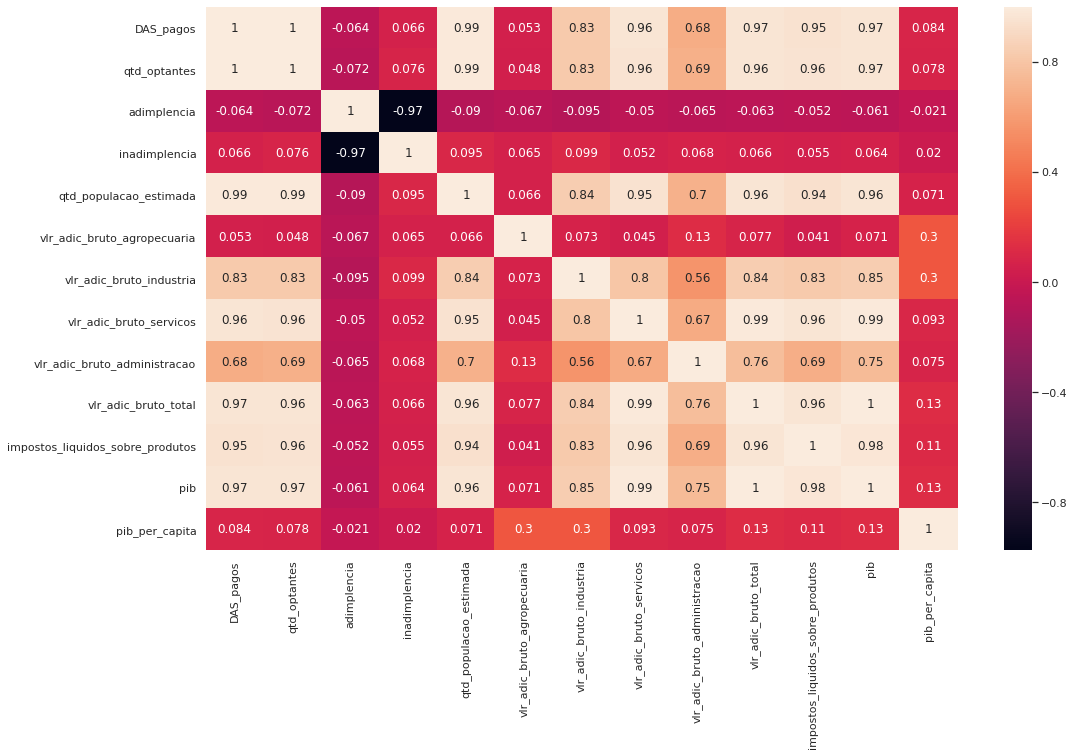

In [137]:
# Matriz de Correlação de Pearson
fig, ax = plt.subplots(figsize=(15,10))

df_pearson = sns.heatmap(df_completo[['DAS_pagos','qtd_optantes','adimplencia','inadimplencia','qtd_populacao_estimada','vlr_adic_bruto_agropecuaria','vlr_adic_bruto_industria','vlr_adic_bruto_servicos','vlr_adic_bruto_administracao','vlr_adic_bruto_total','impostos_liquidos_sobre_produtos','pib','pib_per_capita']].corr(method='pearson'), annot=True) # 

In [138]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   cod_mun                           5570 non-null   int64   
 1   DAS_pagos                         5570 non-null   int64   
 2   qtd_optantes                      5570 non-null   int64   
 3   adimplencia                       5570 non-null   float64 
 4   inadimplencia                     5570 non-null   float64 
 5   uf                                5570 non-null   object  
 6   qtd_populacao_estimada            5570 non-null   int64   
 7   nm_municipio                      5570 non-null   object  
 8   vlr_adic_bruto_agropecuaria       5570 non-null   int64   
 9   vlr_adic_bruto_industria          5570 non-null   int64   
 10  vlr_adic_bruto_servicos           5570 non-null   int64   
 11  vlr_adic_bruto_administracao      5570 non-null   int64 

In [139]:
# Normalização dos dados com MinMaxScaler

df_prep = df_completo[['inadimplencia','qtd_populacao_estimada','vlr_adic_bruto_agropecuaria','vlr_adic_bruto_industria','vlr_adic_bruto_servicos','vlr_adic_bruto_administracao','vlr_adic_bruto_total']]
scaler = MinMaxScaler()

print(scaler.fit(df_prep))
print(scaler.data_max_)

arr_prep_sc = scaler.transform(df_prep)

#print(df_prep)
#arr_prep_sc



MinMaxScaler(copy=True, feature_range=(0, 1))
[9.60000000e-01 1.23252320e+07 2.48254000e+06 5.80546890e+07
 4.85428813e+08 1.01792841e+08 5.87529064e+08]


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [140]:
# Identifica n_clusters ideal
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": None,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(arr_prep_sc)
    sse.append(kmeans.inertia_)
    
print(sse)

[169.67856621572747, 78.64948565846919, 49.510240271535125, 37.45421853147941, 31.173401763229368, 25.832017308668842, 21.36286600309664, 17.55404583295054, 15.42996235114789, 14.09628784245233]


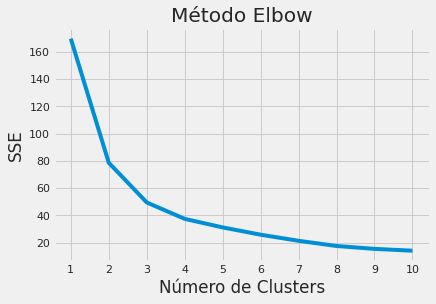

In [141]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title('Método Elbow')
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

In [153]:
# Aplicação do algoritmo k-means com o número ideal de clusters (3) calculado no passo anterior e com 5
kmeans = KMeans(n_clusters = 5)
kmeans.fit(arr_prep_sc)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [157]:
# O método FIT retorna os rótulos dos dados, a predição. Atribuir esse retorno a uma variável e utilizá-la em outra partes do código
df_clusters = df_completo
df_clusters['cluster'] = kmeans.fit_predict(arr_prep_sc)


In [144]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   cod_mun                           5570 non-null   int64   
 1   DAS_pagos                         5570 non-null   int64   
 2   qtd_optantes                      5570 non-null   int64   
 3   adimplencia                       5570 non-null   float64 
 4   inadimplencia                     5570 non-null   float64 
 5   uf                                5570 non-null   object  
 6   qtd_populacao_estimada            5570 non-null   int64   
 7   nm_municipio                      5570 non-null   object  
 8   vlr_adic_bruto_agropecuaria       5570 non-null   int64   
 9   vlr_adic_bruto_industria          5570 non-null   int64   
 10  vlr_adic_bruto_servicos           5570 non-null   int64   
 11  vlr_adic_bruto_administracao      5570 non-null   int64 

In [161]:
# Exportação do dataset agrupado
df_clusters.to_csv('clusters.csv', mode='w',          
               index=False , header=True , encoding='utf-8', sep='|',line_terminator='\r\n',float_format='%.2f')

In [162]:
df_clusters[['cluster','inadimplencia','qtd_populacao_estimada','vlr_adic_bruto_total']].groupby(by=['cluster']).describe()

inadimplencia                                                      \
                count      mean       std   min   25%   50%     75%   max   
cluster                                                                     
0               501.0  0.648224  0.072401  0.57  0.59  0.63  0.6900  0.96   
1              1854.0  0.366354  0.033765  0.30  0.34  0.37  0.3975  0.42   
2               533.0  0.066435  0.056818  0.00  0.00  0.07  0.1200  0.15   
3              1352.0  0.486117  0.039433  0.42  0.45  0.48  0.5200  0.57   
4              1330.0  0.242541  0.041747  0.16  0.21  0.25  0.2800  0.30   

        qtd_populacao_estimada                ...                        \
                         count          mean  ...       75%         max   
cluster                                       ...                         
0                        501.0  45209.682635  ...  26974.00   2219580.0   
1                       1854.0  28974.247033  ...  30590.50    721368.0   
2                        533.0   7896.257036  ...   9215.00    153033.0   
3                       1352.0  83004.435651  ...  44010.25  12325232.0   
4                       1330.0  14253.146617  ...  18127.50    240408.0   

        vlr_adic_bruto_total                                                 \
                       count          mean           std      min       25%   
cluster                                                                       
0                      501.0  9.405799e+05  4.104492e+06  13772.0  63786.00   
1                     1854.0  7.761173e+05  1.965780e+06  16989.0  99586.75   
2                      533.0  1.413629e+05  2.907349e+05  17604.0  48617.00   
3                     1352.0  2.704440e+06  1.960875e+07  17392.0  94597.50   
4                     1330.0  2.776306e+05  4.215033e+05  18276.0  74134.25   

                                           
              50%        75%          max  
cluster                                    
0        139799.0  288653.00   63229972.0  
1        224634.0  628573.75   35246672.0  
2         75878.0  149441.00    5120140.0  
3        233171.0  900688.75  587529064.0  
4        150111.0  305885.50    5667718.0  

[5 rows x 24 columns]

In [170]:
df_clusters[['cluster','porte','cod_mun']].groupby(by=['cluster','porte']).count()

cod_mun
cluster porte                
0       P1 Pequeno      365.0
        P2 Pequeno       70.0
        P3 Médio         25.0
        P4 Grande        38.0
        P5 Metrópole      3.0
1       P1 Pequeno     1283.0
        P2 Pequeno      314.0
        P3 Médio        170.0
        P4 Grande        87.0
        P5 Metrópole      NaN
2       P1 Pequeno      516.0
        P2 Pequeno       15.0
        P3 Médio          1.0
        P4 Grande         1.0
        P5 Metrópole      NaN
3       P1 Pequeno      836.0
        P2 Pequeno      205.0
        P3 Médio        118.0
        P4 Grande       179.0
        P5 Metrópole     14.0
4       P1 Pequeno     1132.0
        P2 Pequeno      157.0
        P3 Médio         37.0
        P4 Grande         4.0
        P5 Metrópole      NaN

In [171]:
kmeans.cluster_centers_

array([[6.75232868e-01, 3.60532608e-03, 1.76679020e-02, 3.76810650e-03,
        9.26645334e-04, 2.13504398e-03, 1.57750438e-03],
       [3.81655873e-01, 2.28590853e-03, 2.72793738e-02, 3.39163820e-03,
        7.84672843e-04, 1.17464966e-03, 1.29723041e-03],
       [6.92034084e-02, 5.77733982e-04, 1.29616257e-02, 4.22569621e-04,
        9.36862174e-05, 2.78473707e-04, 2.17170326e-04],
       [5.06371733e-01, 6.67197284e-03, 2.64901245e-02, 9.52472124e-03,
        3.38988307e-03, 4.21827540e-03, 4.57974106e-03],
       [2.52692211e-01, 1.09732563e-03, 1.69736339e-02, 9.85423561e-04,
        2.33393273e-04, 5.38540596e-04, 4.50227006e-04]])

In [172]:
kmeans.labels_

#df_prep_sc['cluster'] = 

array([4, 3, 0, ..., 3, 4, 3], dtype=int32)

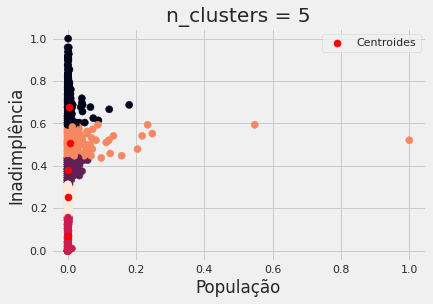

In [173]:
# Atributos: 'qtd_optantes','inadimplencia','qtd_populacao_estimada','vlr_adic_bruto_total'
plt.scatter(arr_prep_sc[:,1], arr_prep_sc[:,0], c=kmeans.labels_, s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0],  c='red', label='Centroides', s = 50)
plt.title('n_clusters = 5')
plt.xlabel('População')
plt.ylabel('Inadimplência')
#plt.yscale('linear')
plt.legend()

plt.show()

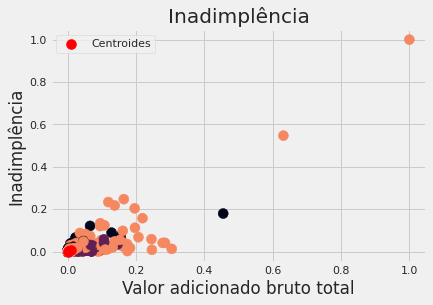

In [174]:
plt.scatter(arr_prep_sc[:,3], arr_prep_sc[:,1], c = kmeans.labels_, s=100) 
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 1],  c = 'red',label = 'Centroides', s=100)
plt.title('Inadimplência')
plt.xlabel('Valor adicionado bruto total')
plt.ylabel('Inadimplência')
#plt.yscale('linear')
plt.legend()

plt.show()

<AxesSubplot:xlabel='qtd_populacao_estimada'>

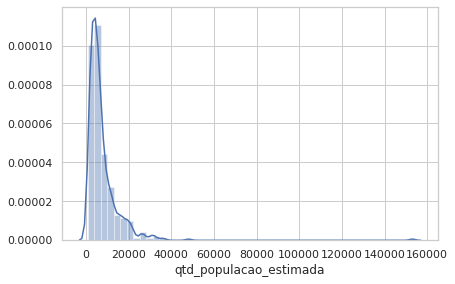

In [103]:
sns.set(style='whitegrid') # v 0.9.0

# Distribuição inadimplência
sns.distplot(df_completo['qtd_populacao_estimada'].loc[df_clusters['cluster'] == 3])

In [83]:
# Cluster 0 - maior inadimplência)
df_cluster_max = df_completo[df_completo['cluster'] == 3].sort_values(by=['inadimplencia'], ascending=True)

df_cluster_max.describe()

,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,qtd_populacao_estimada,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,vlr_adic_bruto_servicos,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,cluster
count,5.010000e+02,501.000000,501.000000,501.000000,501.000000,5.010000e+02,501.000000,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,501.00000,501.0
mean,2.505949e+06,703.916168,1882.958084,0.351756,0.648224,4.520968e+04,43861.273453,2.191049e+05,4.519674e+05,2.256464e+05,9.405799e+05,1.343802e+05,1.074960e+06,18778.23475,3.0
std,1.095586e+06,2854.455988,7694.694153,0.072350,0.072401,1.548750e+05,74407.403189,1.394180e+06,2.156908e+06,7.413713e+05,4.104492e+06,8.515653e+05,4.933795e+06,25169.66321,0.0
min,1.100031e+06,1.000000,12.000000,0.040000,0.570000,1.242000e+03,0.000000,5.120000e+02,2.149000e+03,9.674000e+03,1.377200e+04,3.540000e+02,1.412600e+04,5351.20000,3.0
25%,1.600105e+06,31.000000,91.000000,0.310000,0.590000,5.272000e+03,7979.000000,2.583000e+03,1.315600e+04,2.802000e+04,6.378600e+04,2.099000e+03,6.645300e+04,8197.35000,3.0
50%,2.205581e+06,66.000000,195.000000,0.370000,0.630000,1.175500e+04,18573.000000,6.790000e+03,2.940800e+04,5.292000e+04,1.397990e+05,5.223000e+03,1.471740e+05,11359.84000,3.0
75%,3.111150e+06,157.000000,444.000000,0.410000,0.690000,2.697400e+04,45834.000000,2.082300e+04,6.919300e+04,1.163180e+05,2.886530e+05,1.556800e+04,3.110960e+05,19420.70000,3.0
max,5.221809e+06,27072.000000,77502.000000,0.430000,0.960000,2.219580e+06,586045.000000,2.642637e+07,2.766580e+07,8.928806e+06,6.322997e+07,1.496235e+07,7.819232e+07,291967.12000,3.0


In [209]:
df_porte = df_cluster_max[['porte','inadimplencia','qtd_optantes']].groupby(by='porte')
relat = df_porte.mean() 
relat['qtd'] = df_porte['porte'].count() 
relat

,inadimplencia,qtd_optantes,qtd
porte,,,
P1 Pequeno,0.649315,196.005479,365
P2 Pequeno,0.659571,693.900000,70
P3 Médio,0.640800,2112.440000,25
P4 Grande,0.623158,15077.105263,38
P5 Metrópole,0.630000,65835.333333,3


In [88]:
df_cluster_max[df_cluster_max['porte'] == 'P5 Metrópole']

,cod_mun,nm_municipio,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,uf,qtd_populacao_estimada,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,...,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,atividade_maior_vlr_adic_bruto,atividade_2maior_vlr_adic_bruto,atividade_3maior_vlr_adic_bruto,porte,cluster
635,2111300,SAO LUIS,18400,45029,0.41,0.59,MA,1108975,20396,7460218,...,3568480,27190520,6415281,33605801,30699.57,Demais serviços,Comércio e reparação de veículos automotores e...,Indústrias de transformação,P5 Metrópole,3
169,1501402,BELEM,27072,74975,0.36,0.64,PA,1499641,69341,3809666,...,4947567,26757308,4727541,31484849,21191.47,Demais serviços,Comércio e reparação de veículos automotores e...,"Administração, defesa, educação e saúde públic...",P5 Metrópole,3
111,1302603,MANAUS,26020,77502,0.34,0.66,AM,2219580,209000,26426370,...,8928806,63229972,14962349,78192321,36445.75,Indústrias de transformação,Demais serviços,"Administração, defesa, educação e saúde públic...",P5 Metrópole,3


In [206]:
df_uf = df_cluster_max[['uf','inadimplencia','qtd_optantes']].groupby(by='uf')
relat = df_uf.mean().sort_values(by='inadimplencia', ascending=False)
relat['qtd'] = df_uf['uf'].count() 
relat

,inadimplencia,qtd_optantes,qtd
uf,,,
AP,0.741538,1374.230769,13
AM,0.730444,2201.133333,45
RR,0.685000,1632.300000,10
PI,0.657027,124.486486,37
TO,0.655000,151.911765,34
PE,0.648750,303.000000,16
MA,0.647377,1127.967213,61
RS,0.647143,268.357143,14
SE,0.646923,247.307692,13


In [181]:
# Cluster 1 - inadimplência média - municípios menores
df_cluster_med = df_clusters[df_clusters['cluster'] == 1].sort_values(by=['inadimplencia'], ascending=True)

df_cluster_med[['inadimplencia','qtd_populacao_estimada','vlr_adic_bruto_total']].describe()

,inadimplencia,qtd_populacao_estimada,vlr_adic_bruto_total
count,1854.000000,1854.000000,1.854000e+03
mean,0.366354,28974.247033,7.761173e+05
std,0.033765,51574.276684,1.965780e+06
min,0.300000,946.000000,1.698900e+04
25%,0.340000,6616.000000,9.958675e+04
50%,0.370000,14108.500000,2.246340e+05
75%,0.397500,30590.500000,6.285738e+05
max,0.420000,721368.000000,3.524667e+07


In [207]:
df_porte = df_cluster_med[['porte','inadimplencia','qtd_optantes']].groupby(by='porte')
relat = df_porte.mean() 
relat['qtd'] = df_porte['porte'].count() 
relat

,inadimplencia,qtd_optantes,qtd
porte,,,
P1 Pequeno,0.364076,420.070148,1283
P2 Pequeno,0.366369,1525.496815,314
P3 Médio,0.374235,3230.100000,170
P4 Grande,0.384483,12659.436782,87
P5 Metrópole,NaN,NaN,0


<AxesSubplot:xlabel='porte', ylabel='inadimplencia'>

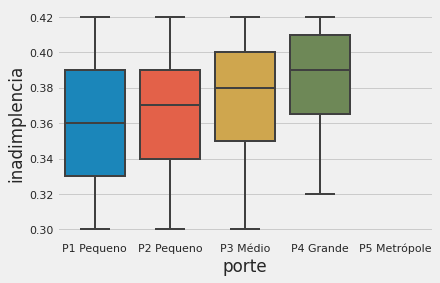

In [184]:
sns.boxplot(x='porte', y='inadimplencia', data=df_cluster_med, linewidth=2)

In [185]:
# Cluster 2 - menor inadimplência
df_cluster_min = df_clusters[df_completo['cluster'] == 2].sort_values(by=['inadimplencia'], ascending=True)

df_cluster_min.describe()
#df_cluster_min[df_cluster_min['inadimplencia'] > 0].head(10)

,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,qtd_populacao_estimada,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,vlr_adic_bruto_servicos,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,cluster
count,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02,5.330000e+02,5.330000e+02,533.000000,5.330000e+02,533.000000,5.330000e+02,533.000000,533.0
mean,3.377501e+06,222.622889,238.611632,0.980488,0.066435,7896.257036,3.217775e+04,2.488200e+04,4.762679e+04,36676.309568,1.413629e+05,11452.774859,1.528157e+05,20453.026191,2.0
std,9.141354e+05,312.246201,336.722847,0.155881,0.056818,9159.386238,8.631613e+04,1.054367e+05,1.300289e+05,36092.969470,2.907349e+05,42569.459918,3.298536e+05,16377.014398,0.0
min,1.101203e+06,16.000000,16.000000,0.850000,0.000000,776.000000,8.070000e+02,5.690000e+02,3.156000e+03,9280.000000,1.760400e+04,368.000000,1.811800e+04,5064.600000,2.0
25%,2.600203e+06,84.000000,84.000000,0.880000,0.000000,3231.000000,6.056000e+03,2.030000e+03,1.155100e+04,18959.000000,4.861700e+04,1804.000000,5.066800e+04,8925.500000,2.0
50%,3.146552e+06,141.000000,145.000000,0.940000,0.070000,5444.000000,1.702900e+04,4.176000e+03,1.993300e+04,27543.000000,7.587800e+04,3487.000000,7.975000e+04,15471.920000,2.0
75%,4.215687e+06,243.000000,261.000000,1.030000,0.120000,9215.000000,3.590600e+04,1.318800e+04,4.350300e+04,42306.000000,1.494410e+05,8732.000000,1.582920e+05,26207.290000,2.0
max,5.221908e+06,5319.000000,5395.000000,2.000000,0.150000,153033.000000,1.814279e+06,1.769676e+06,2.551100e+06,608758.000000,5.120140e+06,753360.000000,5.873500e+06,136948.230000,2.0


In [208]:
df_porte = df_cluster_min[['porte','inadimplencia','qtd_optantes']].groupby(by='porte')
relat = df_porte.mean() 
relat['qtd'] = df_porte['porte'].count() 
relat

,inadimplencia,qtd_optantes,qtd
porte,,,
P1 Pequeno,0.065388,208.903101,516
P2 Pequeno,0.100667,833.466667,15
P3 Médio,0.150000,1489.000000,1
P4 Grande,0.010000,5395.000000,1
P5 Metrópole,NaN,NaN,0


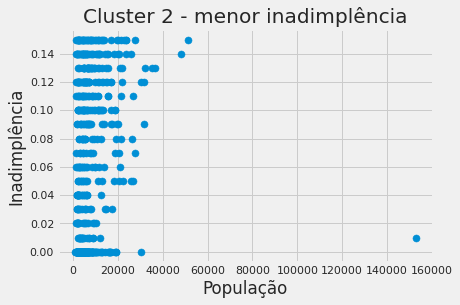

In [187]:
df_grafico = df_completo[df_completo['cluster'] == 2]

plt.scatter(df_grafico['qtd_populacao_estimada'], df_grafico['inadimplencia'], s=50) 
#plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 1],  c = 'red',label = 'Centroides', s=100)
plt.title('Cluster 2 - menor inadimplência')
plt.xlabel('População')
plt.ylabel('Inadimplência')

#plt.legend()

plt.show()

In [189]:
df_cluster_min[df_cluster_min['qtd_populacao_estimada'] > 25000]

,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,uf,qtd_populacao_estimada,nm_municipio,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,...,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,atividade_maior_vlr_adic_bruto,atividade_2maior_vlr_adic_bruto,atividade_3maior_vlr_adic_bruto,porte,cluster
100,1301803,75,75,1.00,0.00,AM,30436,Ipixuna,12159,4575,...,110494,149816,2470,152286,5263.41,"Administração, defesa, educação e saúde públic...",Demais serviços,"Produção florestal, pesca e aquicultura",P2 Pequeno,2
3611,3530706,5319,5395,0.99,0.01,SP,153033,Mogi Guaçu,190606,1769676,...,608758,5120140,753360,5873500,38971.42,Demais serviços,Indústrias de transformação,"Administração, defesa, educação e saúde públic...",P4 Grande,2
2759,3144607,1253,1318,0.95,0.05,MG,26826,Nepomuceno,99163,20413,...,111406,425835,31499,457334,17122.86,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,P2 Pequeno,2
1961,2911105,684,723,0.95,0.05,BA,25857,Formosa do Rio Preto,1814279,90098,...,112351,2589308,105842,2695149,106481.34,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Comércio e reparação de veículos automotores e...,P2 Pequeno,2
1641,2615805,170,182,0.93,0.07,PE,27551,Tupanatinga,21969,6292,...,112959,180004,6186,186190,6882.65,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária",P2 Pequeno,2
200,1503077,251,272,0.92,0.08,PA,26111,Garrafão do Norte,46582,8717,...,111304,212278,6478,218755,8407.20,"Administração, defesa, educação e saúde públic...",Demais serviços,"Agricultura, inclusive apoio à agricultura e a...",P2 Pequeno,2
1523,2605301,496,548,0.91,0.09,PE,31766,Exu,36235,7833,...,136143,256609,11774,268382,8417.20,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária",P2 Pequeno,2
2171,2928208,410,463,0.89,0.11,BA,26705,Santana,36641,20644,...,92423,233952,15790,249742,9418.19,"Administração, defesa, educação e saúde públic...",Demais serviços,"Pecuária, inclusive apoio à pecuária",P2 Pequeno,2
4696,4304804,1086,1240,0.88,0.12,RS,30241,Carlos Barbosa,42516,1127557,...,154155,2007261,521828,2529089,85997.12,Indústrias de transformação,Demais serviços,Comércio e reparação de veículos automotores e...,P2 Pequeno,2
2726,3141801,642,727,0.88,0.12,MG,31497,Minas Novas,61730,15194,...,122431,287832,10395,298227,9476.24,"Administração, defesa, educação e saúde públic...",Demais serviços,"Produção florestal, pesca e aquicultura",P2 Pequeno,2


In [190]:
# Cluster 3 - média alta - municípios maiores
df_cluster_medA = df_completo[df_clusters['cluster'] == 3].sort_values(by=['inadimplencia'], ascending=True)

df_cluster_medA[['inadimplencia','qtd_populacao_estimada','vlr_adic_bruto_total']].describe()

,inadimplencia,qtd_populacao_estimada,vlr_adic_bruto_total
count,1352.000000,1.352000e+03,1.352000e+03
mean,0.486117,8.300444e+04,2.704440e+06
std,0.039433,4.346617e+05,1.960875e+07
min,0.420000,8.380000e+02,1.739200e+04
25%,0.450000,6.947250e+03,9.459750e+04
50%,0.480000,1.700550e+04,2.331710e+05
75%,0.520000,4.401025e+04,9.006888e+05
max,0.570000,1.232523e+07,5.875291e+08


In [191]:
df_cluster_medA[['porte','inadimplencia','qtd_populacao_estimada']].groupby(by='porte').describe()

inadimplencia                                                  \
                     count      mean       std   min     25%   50%     75%   
porte                                                                        
P1 Pequeno           836.0  0.486316  0.039000  0.43  0.4500  0.48  0.5200   
P2 Pequeno           205.0  0.481756  0.040666  0.43  0.4500  0.48  0.5100   
P3 Médio             118.0  0.483051  0.036597  0.43  0.4500  0.48  0.5100   
P4 Grande            179.0  0.491006  0.040434  0.42  0.4600  0.49  0.5250   
P5 Metrópole          14.0  0.501429  0.050361  0.42  0.4675  0.50  0.5275   

                   qtd_populacao_estimada                              \
               max                  count          mean           std   
porte                                                                   
P1 Pequeno    0.56                  836.0  1.021492e+04  6.355791e+03   
P2 Pequeno    0.56                  205.0  3.433700e+04  6.673050e+03   
P3 Médio      0.56                  118.0  7.188883e+04  1.433665e+04   
P4 Grande     0.56                  179.0  2.602673e+05  1.833202e+05   
P5 Metrópole  0.57                   14.0  2.969465e+06  3.063425e+06   

                                                                        
                    min         25%        50%         75%         max  
porte                                                                   
P1 Pequeno        838.0     4657.25     8791.0    15019.00     24705.0  
P2 Pequeno      25010.0    28936.00    33065.0    39314.00     49621.0  
P3 Médio        50429.0    59947.75    71680.0    83739.25     98239.0  
P4 Grande      100346.0   129794.00   196500.0   329951.50    906092.0  
P5 Metrópole  1025360.0  1416153.75  1801043.5  2836676.50  12325232.0

<AxesSubplot:xlabel='porte', ylabel='inadimplencia'>

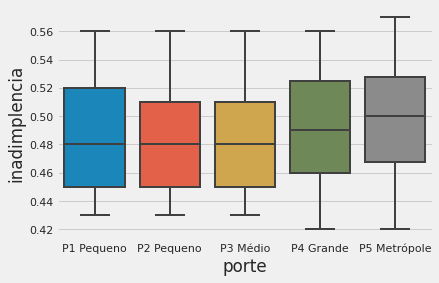

In [193]:
sns.boxplot(x='porte', y='inadimplencia', data=df_cluster_medA, linewidth=2)

In [194]:
df_metropole = df_cluster_medA[df_cluster_medA['porte'] == 'P5 Metrópole']
df_metropole[df_cluster_medA['inadimplencia'] > 0.5]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,uf,qtd_populacao_estimada,nm_municipio,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,...,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,atividade_maior_vlr_adic_bruto,atividade_2maior_vlr_adic_bruto,atividade_3maior_vlr_adic_bruto,porte,cluster
949,2304400,76705,159984,0.48,0.52,CE,2686612,Fortaleza,65987,7995209,...,9181811,57592882,9431207,67024088,25356.73,Demais serviços,Comércio e reparação de veículos automotores e...,"Administração, defesa, educação e saúde públic...",P5 Metrópole,3
1596,2611606,45923,95120,0.48,0.52,PE,1653461,Recife,46961,5532444,...,7051748,43865659,8535828,52401487,31994.38,Demais serviços,Comércio e reparação de veículos automotores e...,"Administração, defesa, educação e saúde públic...",P5 Metrópole,3
5569,5300108,94927,200313,0.47,0.53,DF,3055149,Brasília,1022691,9541298,...,101792841,226124917,28692287,254817205,85661.39,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...,P5 Metrópole,3
3242,3304557,241010,557019,0.43,0.57,RJ,6747815,Rio de Janeiro,86011,36657075,...,50192408,271663304,92388755,364052058,54426.08,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,P5 Metrópole,3
2162,2927408,84932,198835,0.43,0.57,BA,2886698,Salvador,44049,6919077,...,8517480,55161317,8364775,63526092,22232.68,Demais serviços,Comércio e reparação de veículos automotores e...,"Administração, defesa, educação e saúde públic...",P5 Metrópole,3
3247,3304904,28907,67880,0.43,0.57,RJ,1091737,São Gonçalo,60566,2076698,...,6598974,17108844,1392452,18501296,17167.60,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...,P5 Metrópole,3


In [195]:
# Cluster 4 - inadimplência baixa
df_cluster_bxa = df_clusters[df_clusters['cluster'] == 4].sort_values(by=['inadimplencia'], ascending=True)

df_cluster_bxa.describe()

,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,qtd_populacao_estimada,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,vlr_adic_bruto_servicos,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,cluster
count,1.330000e+03,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1.330000e+03,1.330000e+03,1330.000000,1.330000e+03,1330.000000,1.330000e+03,1330.000000,1330.0
mean,3.393361e+06,432.774436,578.062406,0.757436,0.242541,14253.146617,42017.459398,5.748596e+04,1.151280e+05,62999.210526,2.776306e+05,28131.305263,3.057619e+05,21856.463075,4.0
std,9.083251e+05,683.317999,934.953806,0.041754,0.041747,15385.200311,58081.474622,1.444139e+05,2.247057e+05,63441.125525,4.215033e+05,63052.785178,4.815106e+05,17231.610365,0.0
min,1.100015e+06,15.000000,18.000000,0.690000,0.160000,1118.000000,0.000000,4.860000e+02,2.993000e+03,10869.000000,1.827600e+04,64.000000,1.888500e+04,5475.960000,4.0
25%,2.800202e+06,119.000000,155.250000,0.720000,0.210000,4940.000000,9675.250000,3.774250e+03,2.079300e+04,25504.000000,7.413425e+04,3471.250000,7.798650e+04,9964.080000,4.0
50%,3.155454e+06,243.000000,322.000000,0.750000,0.250000,9839.000000,23349.000000,1.050150e+04,4.722400e+04,44419.000000,1.501110e+05,9011.000000,1.589815e+05,17235.230000,4.0
75%,4.205084e+06,520.500000,686.750000,0.790000,0.280000,18127.500000,52471.500000,4.099200e+04,1.170650e+05,79099.250000,3.058855e+05,24245.250000,3.285412e+05,28159.467500,4.0
max,5.222302e+06,15748.000000,21758.000000,0.840000,0.300000,240408.000000,695027.000000,1.835455e+06,3.389685e+06,992721.000000,5.667718e+06,795264.000000,6.462981e+06,204457.110000,4.0


In [196]:
df_porte = df_cluster_bxa[['porte','inadimplencia','qtd_populacao_estimada']].groupby(by='porte')
relat = df_porte.mean() 
relat['qtd'] = df_porte['porte'].count() 
relat

,inadimplencia,qtd_populacao_estimada,qtd
porte,,,
P1 Pequeno,0.240804,9468.715548,1132
P2 Pequeno,0.250828,33406.566879,157
P3 Médio,0.257027,65076.702703,37
P4 Grande,0.275000,146357.500000,4
P5 Metrópole,NaN,NaN,0


In [197]:
df_cluster_bxa[df_cluster_bxa['porte'] == 'P4 Grande']

,cod_mun,DAS_pagos,qtd_optantes,adimplencia,inadimplencia,uf,qtd_populacao_estimada,nm_municipio,vlr_adic_bruto_agropecuaria,vlr_adic_bruto_industria,...,vlr_adic_bruto_administracao,vlr_adic_bruto_total,impostos_liquidos_sobre_produtos,pib,pib_per_capita,atividade_maior_vlr_adic_bruto,atividade_2maior_vlr_adic_bruto,atividade_3maior_vlr_adic_bruto,porte,cluster
4648,4302105,6437,8599,0.75,0.25,RS,121803,Bento Gonçalves,80264,1835455,...,650528,5168606,794663,5963269,50090.88,Demais serviços,Indústrias de transformação,"Administração, defesa, educação e saúde públic...",P4 Grande,4
3063,3169901,3972,5473,0.73,0.27,MG,116797,Ubá,18717,691103,...,436216,2428840,300313,2729153,23884.41,Demais serviços,Indústrias de transformação,"Administração, defesa, educação e saúde públic...",P4 Grande,4
2490,3122306,15748,21758,0.72,0.28,MG,240408,Divinópolis,53141,1232171,...,992721,5667718,795264,6462981,27388.18,Demais serviços,"Administração, defesa, educação e saúde públic...",Indústrias de transformação,P4 Grande,4
4587,4218707,5043,7212,0.70,0.30,SC,106422,Tubarão,45584,602727,...,463168,3364138,377414,3741552,35655.22,Demais serviços,Comércio e reparação de veículos automotores e...,"Administração, defesa, educação e saúde públic...",P4 Grande,4


In [199]:
# Metrópoles
df_clusters[['cluster','cod_mun','nm_municipio','uf','DAS_pagos','qtd_optantes','inadimplencia','qtd_populacao_estimada']].loc[df_completo['porte'] == 'P5 Metrópole']

,cluster,cod_mun,nm_municipio,uf,DAS_pagos,qtd_optantes,inadimplencia,qtd_populacao_estimada
111,0,1302603,Manaus,AM,26020,77502,0.66,2219580
169,0,1501402,Belém,PA,27072,74975,0.64,1499641
635,0,2111300,São Luís,MA,18400,45029,0.59,1108975
949,3,2304400,Fortaleza,CE,76705,159984,0.52,2686612
1596,3,2611606,Recife,PE,45923,95120,0.52,1653461
1696,3,2704302,Maceió,AL,25987,52131,0.50,1025360
2162,3,2927408,Salvador,BA,84932,198835,0.57,2886698
2309,3,3106200,Belo Horizonte,MG,121323,223823,0.46,2521564
3242,3,3304557,Rio de Janeiro,RJ,241010,557019,0.57,6747815
3247,3,3304904,São Gonçalo,RJ,28907,67880,0.57,1091737


In [201]:
df_clusters[['uf','cluster']].loc[df_completo['cluster'] == 0].groupby(by=['uf']).count()

,cluster
uf,
AC,12
AL,18
AM,45
AP,13
BA,28
CE,2
GO,14
MA,61
MG,20


In [202]:
df_clusters[['uf','qtd_optantes','inadimplencia']].loc[df_clusters['cluster'] == 0].groupby('uf').mean().sort_values(by='inadimplencia', ascending=False)

,qtd_optantes,inadimplencia
uf,,
AP,1374.230769,0.741538
AM,2201.133333,0.730444
RR,1632.300000,0.685000
PI,124.486486,0.657027
TO,151.911765,0.655000
PE,303.000000,0.648750
MA,1127.967213,0.647377
RS,268.357143,0.647143
SE,247.307692,0.646923
